<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/LAB_for_ROC_Curve_and_AUC__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Receiver Operating Characteristic (ROC) curve
The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.

True positive rate: This metric is calculated using the true positives and the false negatives according to the following formula.
# TPR (Sensitinity) = TP / (TP + FN)

False positive rate: This metric is calculated using the false positives and the true negatives according to the following formula.
# FPR (1 - Specificity) = FP / (TN + FP)

ROC curves make it easy to i dentify the best threshold fo making a decision

# AUC

And the AUC can help you decide which categorization method is batter. 

# Confusion Matrix:
When predicting a binary classification problem, it’s usual to label the positive case as 1 and the negative as 0. When the prediction is equal to the actual value, it is a true case; otherwise, it is a negative one. This matrix aims to reveal information about the proportion of the combinations of these scenarios, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).


## Generate synthetic dataset
I going to use the make classification function. Of scikit learn 

In [ ]:
from sklearn.datasets import make_classification

i going to create the 2000 samples in the data sets and its going to create two classes and the feature wil be ten.



In [ ]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

# Add noisy features to make the problem more difficult

And I going to make noisy features. In order to make tha datasets look more real in otherwise it will make perfect prediction and its look just too good to be true so let's make it a little bit more difficult for the ML model to perform

In [ ]:
import numpy as np

In [ ]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Data splitting

Now let's perform the data splitting and now im going to perform the actual train test split using input argument of XY data matrices and the test size im  going to set it to be 20%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

# Build classification model

Now im creating two classification models which we will compares
* The first one will the random forest 
* And second one will be the gaussian naive bayes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Random Forest
And we are going to assign tha random forest to the RF variable and then RF.fit to create the model and input argument will be the X train and Y train wich will the 80% training set and finally it will be the evaluated on test set

In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Naive Bayes
And we are going to assign tha Naive Bayes to the nb variable and then nb.fit to create the model and input argument will be the X train and Y train wich will the 80% training set and finally it will be the evaluated on test set

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Prediction probabilities

So here im creating the prediction probability data matrices and tha baseline im going to have a variable called r_probsand this one will contain zero or the worse case scenario.

and rf_probs contain the probability of the predicted values by the random forest model and for nb_probs contain the naive base model.

Im using tha predict proba fiction to get the probability from the production.

Predict_proba: For most models, you can retrieve the probability of the prediction. Probabilities show if there is a difference in the confidence level of the model on the selected class. A higher predict_proba will represent higher confidence levels about the output.


In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

# ROC Curve
Step 1, choosing a threshold:the ROC curve’s whole idea is to check out different thresholds.By setting the thresholds into equally distant partitions, we can solve our first dilemma.The thresholds that and need to look at are equal to the number of partitions we set, plus one. We will iterate over every threshold defined in this step.


Step 2, threshold comparison:In every iteration, we must compare the predicted probability against the current threshold. If the threshold is higher than the predicted probability, we label the sample as a 0, and with 1 on the contrary. 

Step 3, calculating TPR and FPR:The last part is to calculate the TPR and FPR at every iteration. The method is simple. It’s precisely the same we saw in the last section. The only difference is that we need to save the TPR and FPR in a list before going into the next iteration. The list of TPRs and FPRs pairs is the line in the ROC curve.

To start, we need a method to replicate step 3, which is accomplished by the following.

In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

The core of the algorithm is to iterate over the thresholds defined in step 1. We go through steps 2 & 3 to add the TPR and FPR pair to the list at every iteration.

In [ ]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

Text(0, 0.5, 'True Positive Rate')

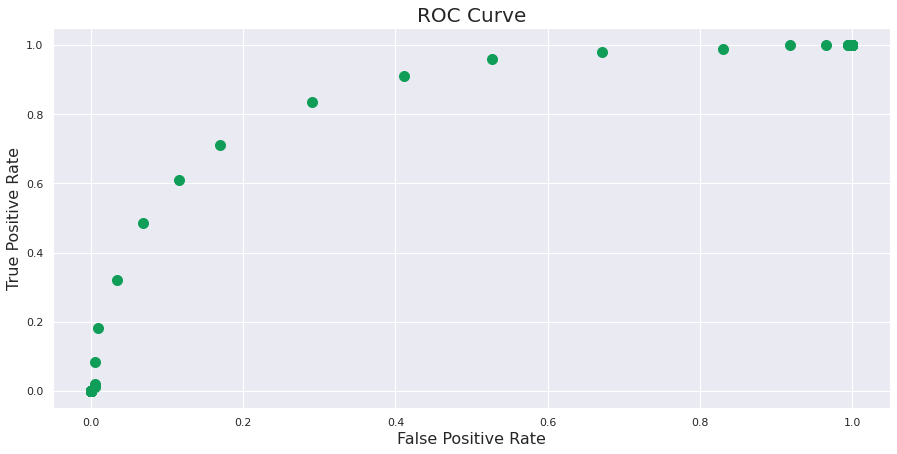

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(15,7))
# use Random Forest in ROC
ROC = roc_from_scratch(rf_probs,Y_test,partitions=100)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

we obtained our first ROC graph. But you can see how increasing the number of partitions gives us a better approximation of the curve.

# Computing AUC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUC
ROC is the receiver operating characteristic AUC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

# Print AUC scores

In [ ]:
# Random (chance) Prediction mean All pridiction are wrong
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
#the performance of the Random Forest
print('Random Forest: AUC = %.3f' % (rf_auc))
#the performance of the Naive Bayes
print('Naive Bayes: AUC = %.3f' % (nb_auc))

Random (chance) Prediction: AUC = 0.500
Random Forest: AUC = 0.861
Naive Bayes: AUC = 0.993


# Calculate ROC curve

compute the FPR and TPR to create the ROC curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

# Plot the ROC curve

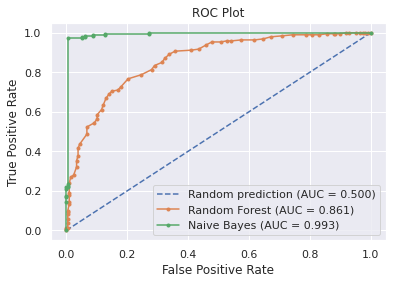

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

SO the NutShell the AUC  is commonly use in the ML to Compair the Performance of the different learning models and ROC in use to the best threshold for making a decision.

So here we can see the naive bayes provided the best performance as it occupies the curve at the far left and topso the AUC will essentially be one (almost one 0.993)

By random forest ht AUC is about 0.861.
